In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

from itertools import count
from IPython import display

import seaborn as sns
from IPython.display import HTML
from scipy.io import loadmat
from utils.helper_util import Func_GaussElimination,plotter
import pandas as pd

In [58]:
##Wave Propagation
c=1
##CFL
CFL=0.8
## grid
N  = 100 ;
x  = np.linspace(0, 1, N+1)
x  = x[0:N] 
dx = x[1] - x[0] 
#Delta
dt=CFL*dx/(c)
t_domain=np.linspace(0, 4, int((4 - 0) / dt + 1))
#initial condition
sigma=0.01
def f_not(x):
    return np.exp((-(x-0.5)**2)/sigma)
##Function_list
f_new_list=[]
xlist=[]
Diff_old=np.zeros(len(x))
Diff_new=np.zeros(len(x))
dat_acq_int=1
for j in range(len(x)):
    Diff_new[j]=f_not(x[j])
f_new_list.append(list(Diff_new))
xlist.append(x)
##AB-2 for solution
dat_acq_int=1
for it in range(1000):
    Diff_new[0]=Diff_new[0]-(c*dt/(2*dx))*(-Diff_new[-1]+Diff_new[1])+(((c*dt)**2)/(2*dx**2))*(Diff_new[-1]-2*Diff_new[0]+Diff_new[1])
    Diff_new[-1]=Diff_new[-1]-(c*dt/(2*dx))*(-Diff_new[-2]+Diff_new[0])+(((c*dt)**2)/(2*dx**2))*(Diff_new[-2]-2*Diff_new[-1]+Diff_new[0])
    for j in range(1,len(x)-1):
        Diff_new[j]=Diff_new[j]-(c*dt/(2*dx))*(-Diff_new[j-1]+Diff_new[j+1])+(((c*dt)**2)/(2*dx**2))*(Diff_new[j-1]-2*Diff_new[j]+Diff_new[j+1])
    #f_new_list.append(list(Diff_new))
    f_new_list.append(list(np.insert(Diff_new, len(x), Diff_new[0])))
    xlist.append(np.insert(x, len(x), 1))
    

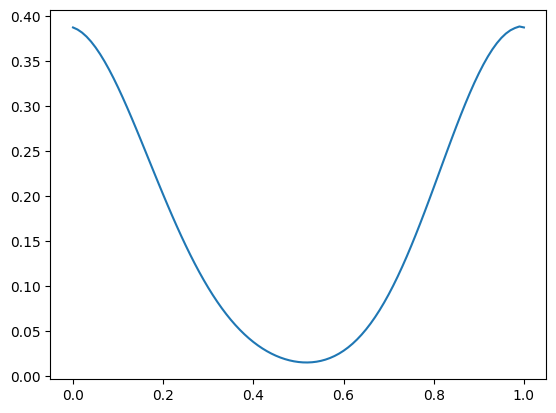

In [62]:
plt.plot(xlist[int(3/dt)],f_new_list[int(3/dt)+70])

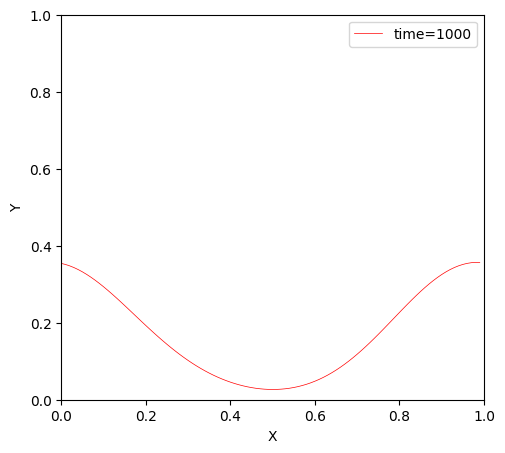

In [28]:
HTML(plotter(xlist,f_new_list,interv=100,dat_acq=dat_acq_int,p=0,q=1).to_html5_video())

In [65]:
pd.concat([pd.DataFrame({'xlist_values':xlist}),pd.DataFrame({'Lex_0.4':f_new_list})],axis=1).to_csv('Lex.csv')


In [ ]:
Re=13.26

In [ ]:
24/()